In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv(r'C:\Learn_AI\Model\Unsupervised_Learning\Data\Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.shape

(167, 10)

In [7]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
cols = df.drop('country' , axis = 1).columns
categorical_features = ['country']
print('total_col:' , len(cols) ,  'cols : ', cols, 'categorical_features:', categorical_features)


total_col: 9 cols :  Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object') categorical_features: ['country']


In [9]:
df_ve = df.copy()
df_ve.drop('country' , axis = 1 , inplace = True)

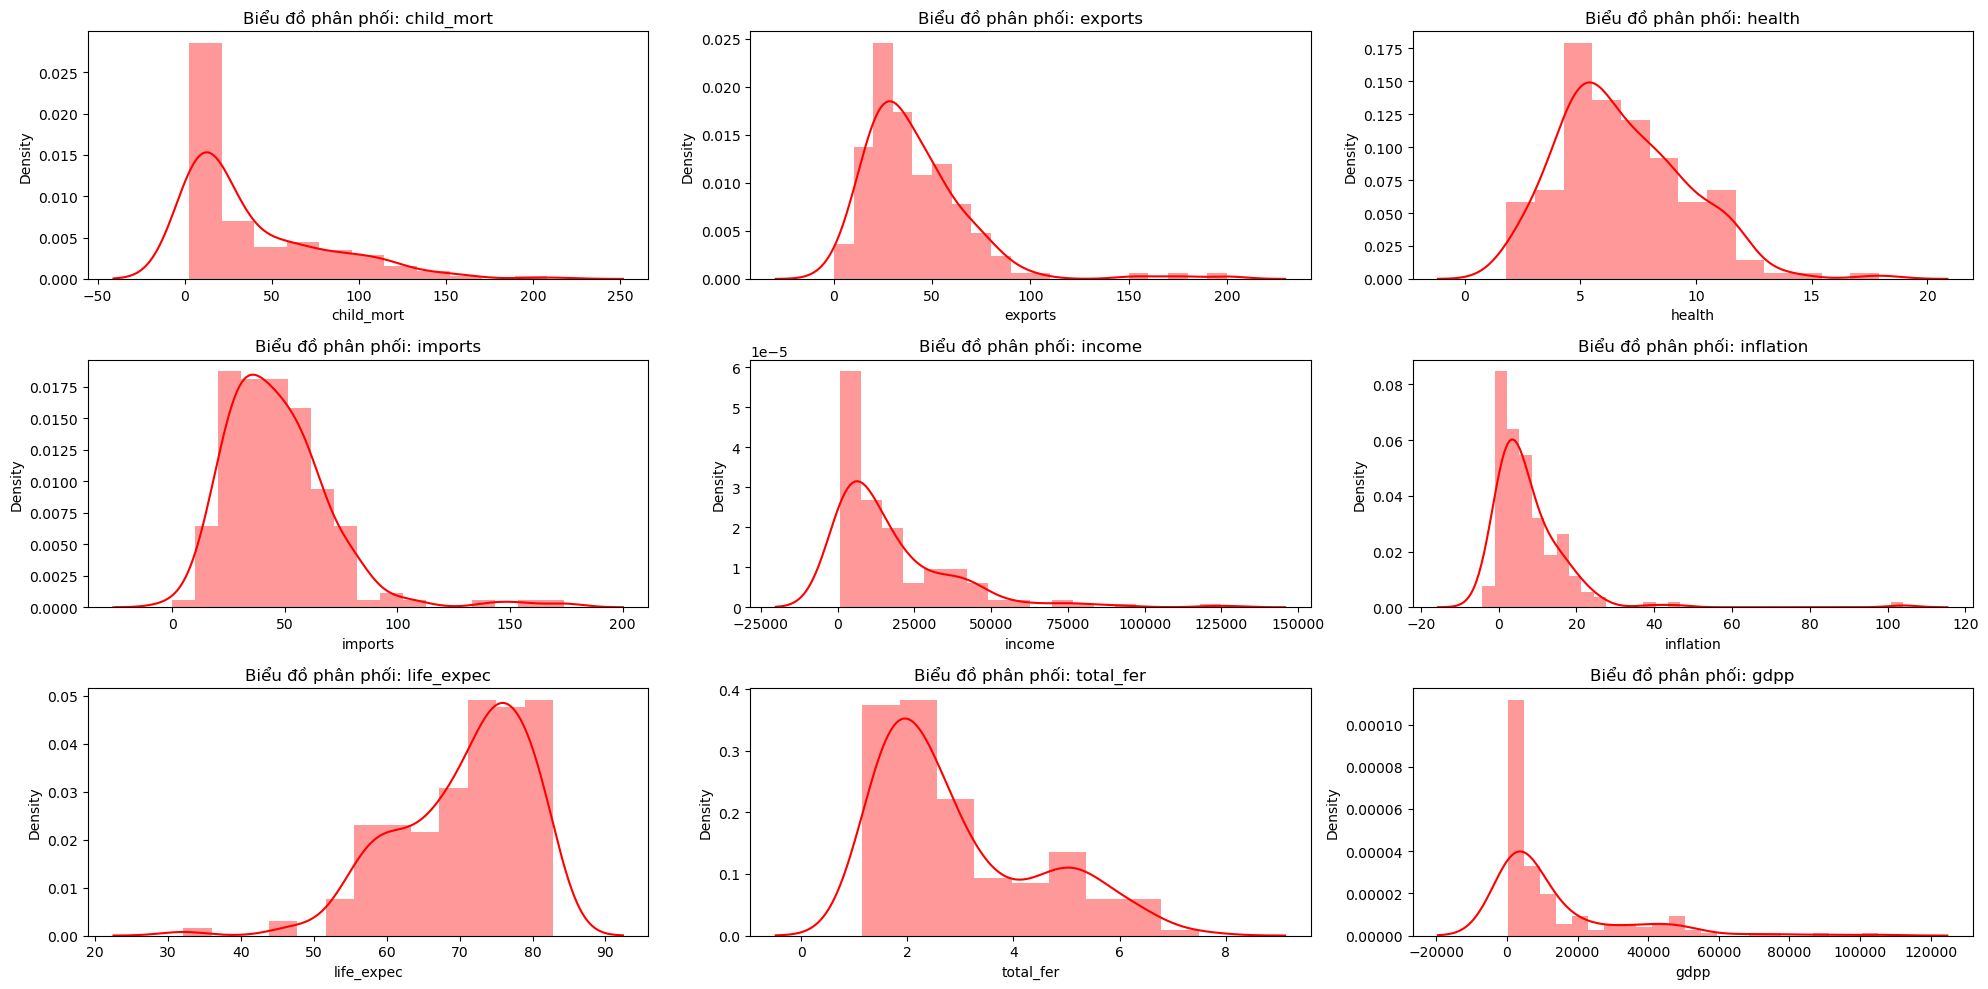

In [10]:
cols_ = 3 
rows = len(cols) // cols_ 
png , axe = plt.subplots(rows , cols_ , figsize = (20,10))
for y in range(rows):
    for x in range(cols_):
        axes = axe[y , x] 
        X = df_ve.iloc[: , y * cols_ + x]
        sns.distplot(x = X , ax= axes , color= 'r')
        title = cols[y*cols_+x]
        axe[y ,x].set_title(f"Biểu đồ phân phối: {title}")
        axe[y , x].set_xlabel(title)
    
plt.tight_layout()
plt.show()

- health gần phân phối chuẩn 
- life_expec hiển thị dự liệu lệch trái 
- còn lại là dự liệu lệch phải 
- Thu nhập bình quân đầu người của quốc gia ở mức rất thấp.  
- Dân số đông dẫn đến tình trạng thiếu hụt nguồn lực sẵn có.  
- Tỷ lệ thất nghiệp cao do thiếu nguồn lực để tạo việc làm.  
- Sự giàu có của quốc gia thấp làm hạn chế khả năng đầu tư và tích lũy vốn.  
- Của cải và thu nhập phân bổ không công bằng trong xã hội.  
- Thiếu các cơ sở giáo dục phù hợp, dẫn đến tỷ lệ mù chữ cao.  
- Mức sống của người dân ở mức thấp.  
- Thiếu tiến bộ về mặt khoa học và kỹ thuật.  
- Dịch vụ y tế yếu kém, cùng với tỷ lệ sinh và tử cao.


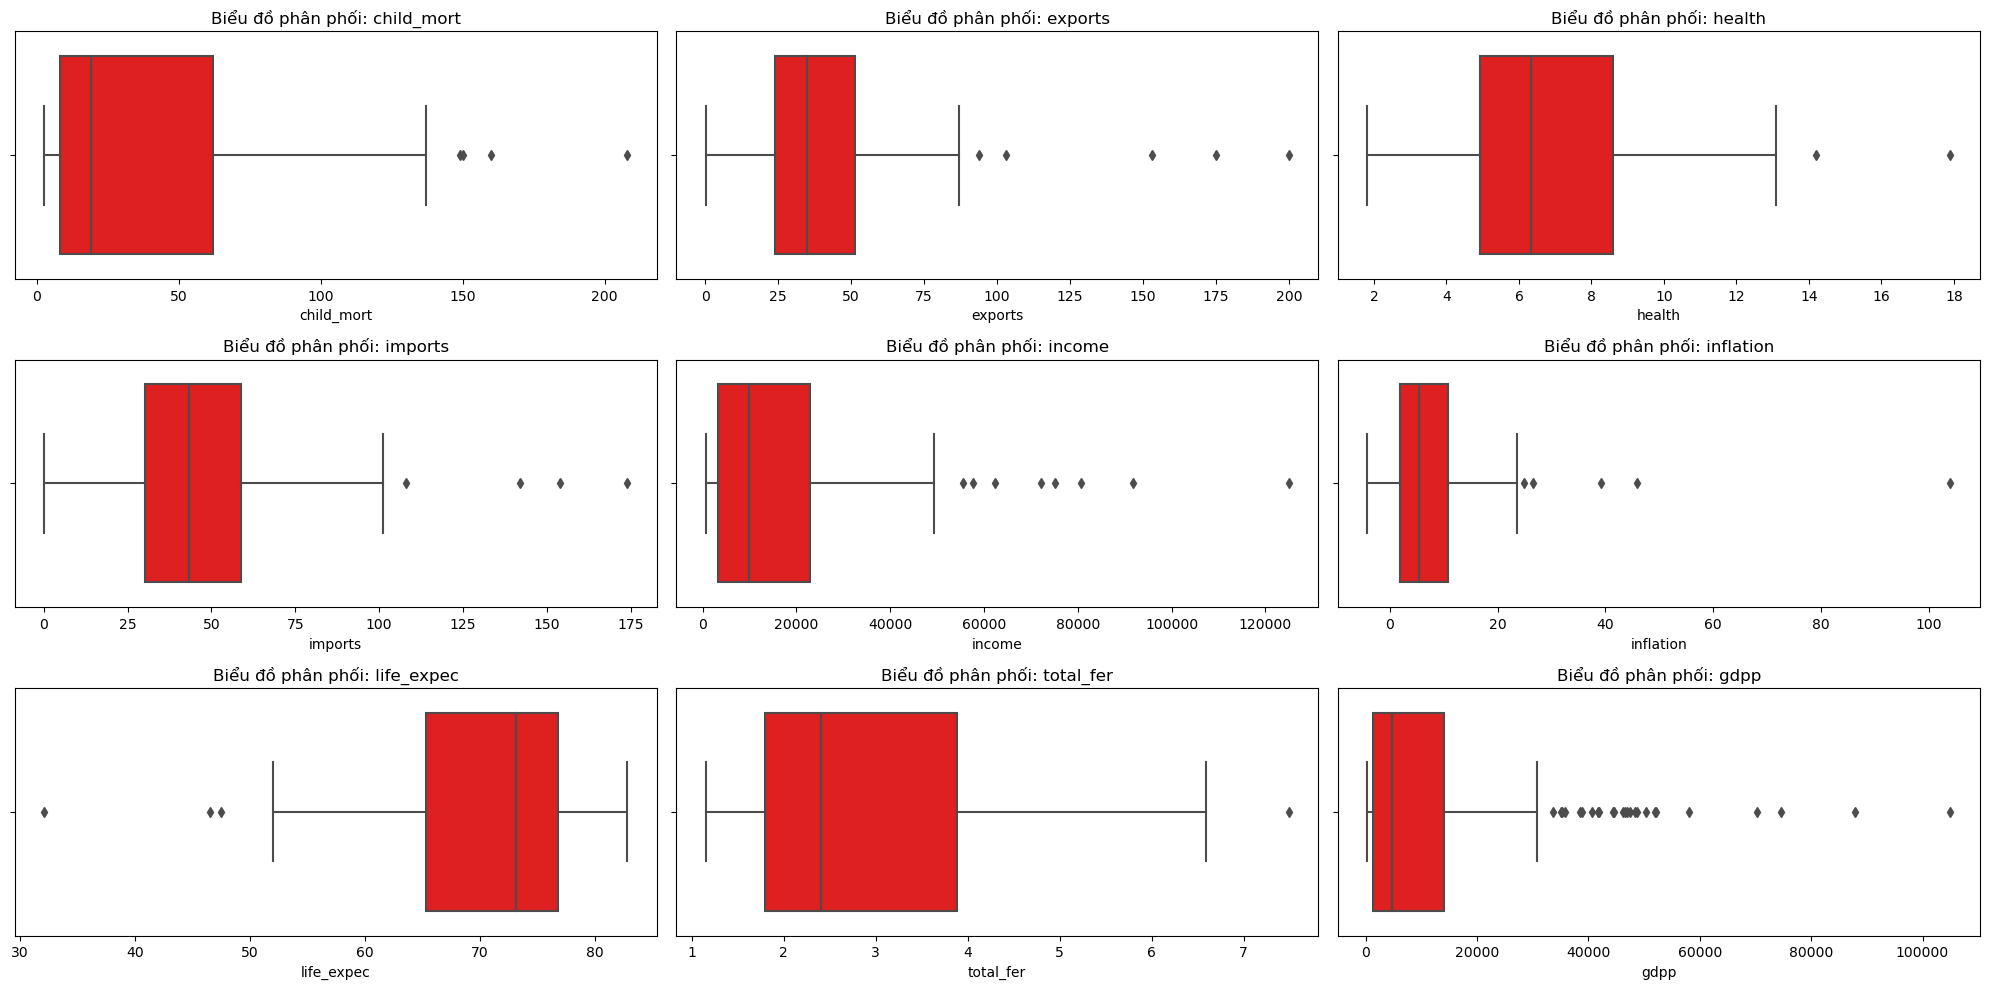

In [11]:
cols_ = 3 
rows = len(cols) // cols_ 
png , axe = plt.subplots(rows , cols_ , figsize = (20,10))
for y in range(rows):
    for x in range(cols_):
        axes = axe[y , x] 
        X = df_ve.iloc[: , y * cols_ + x]
        sns.boxplot(x = X , ax= axes , color= 'r')
        title = cols[y*cols_+x]
        axe[y ,x].set_title(f"Biểu đồ phân phối: {title}")
        axe[y , x].set_xlabel(title)
    
plt.tight_layout()
plt.show()

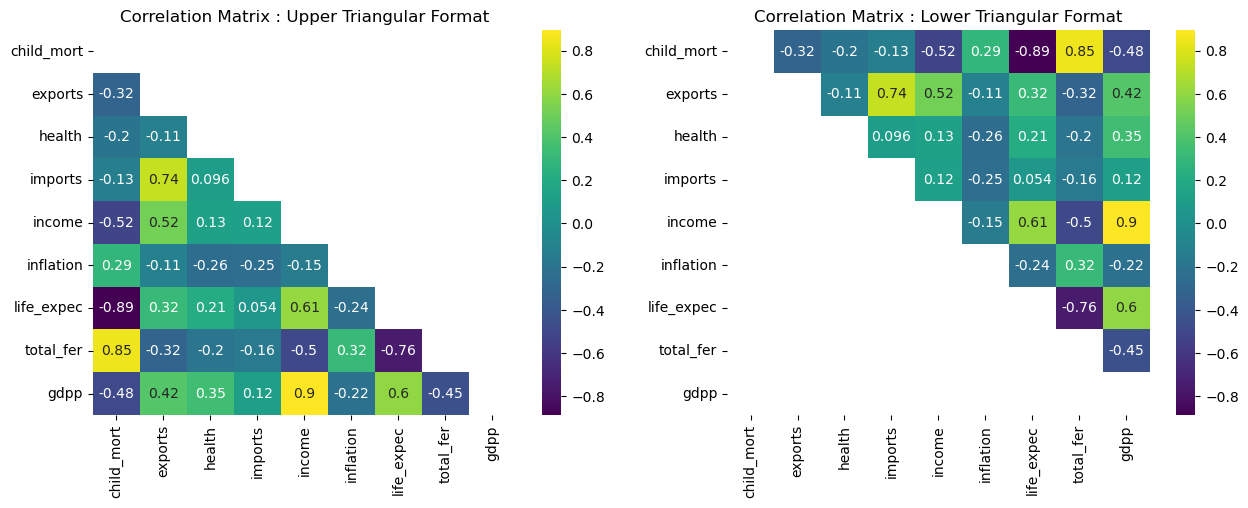

In [12]:
ut = np.triu(df_ve.corr())
lt = np.tril(df_ve.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df_ve.corr(),cmap = 'viridis',annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(df_ve.corr(),cmap = 'viridis',annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');

* Kinh tế ảnh hưởng lớn đến sức khỏe : 
    - GDP cao thường có chất lượng cuộc sống tốt , và tỉ lệ trẻ tử vong thấp  , ít sinh con 
    - Các nước nghèo có tử lệ tử vong và sinh con cao 
* Lạm phát là dấu hiệu bất ổn : 
    - Lạm phát cao thường gắn liền với tỷ lệ tử vong cao , 
* Thương mại và phát triển kinh tế đi đôi :
    - Các quốc gia xuất khẩu nhiều cũng thường có GDP cao và thu nhập cao → mở cửa kinh tế tạo ra thịnh vượng.

* Tạo ra danh mục features là :
    - health : child_mort, health, life_expec, total_fer
    - trade : imports, exports
    - finance : income, inflation, gdpp

In [13]:
df1 = pd.DataFrame()
df1['Health'] = (df['child_mort'] / df['child_mort'].mean()) + (df['health'] / df['health'].mean()) + (df['life_expec'] / df['life_expec'].mean()) + (df['total_fer'] / df['total_fer'].mean())
df1['Trade'] = (df['imports'] / df['imports'].mean()) + (df['exports'] / df['exports'].mean())
df1['Finance'] = (df['income'] / df['income'].mean()) + (df['inflation'] / df['inflation'].mean()) + (df['gdpp'] / df['gdpp'].mean())
df1.head()


,Health,Trade,Finance
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150


In [14]:
df1.describe()

,Health,Trade,Finance
count,167.000000,167.000000,167.000000
mean,4.000000,2.000000,3.000000
std,1.380778,1.104055,2.579372
min,2.216400,0.004057,0.259853
25%,3.079392,1.289485,1.331001
50%,3.485516,1.783360,2.102993
75%,4.593860,2.443429,3.780678
max,8.646305,8.575913,13.913036


In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1.insert(loc = 0, value = list(df['country']), column = 'Country')
df1.head()

,Country,Health,Trade,Finance
0,Afghanistan,0.625740,0.139614,0.079820
1,Albania,0.127451,0.199901,0.088756
2,Algeria,0.182485,0.186622,0.212808
3,Angola,0.661381,0.283058,0.236946
4,Antigua and Barbuda,0.116409,0.275189,0.145043


In [18]:
df2 = df.copy(deep = True)

col = list(df.columns)
col.remove('health'); col.remove('country')

df2['health'] = ss.fit_transform(df2[['health']]) # Standardization

for i in col:
    df2[i] = mms.fit_transform(df2[[i]]) # Normalization
df2.drop(columns = 'country',inplace = True) 
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.279088,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,-0.097016,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,-0.966073,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,-1.448071,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,-0.286894,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [21]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

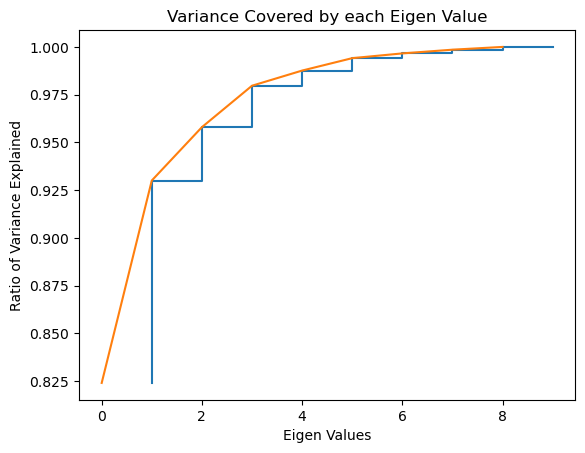

In [22]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [24]:
m1 = df1.drop(columns = ['Country']).values # Feature Combination : Health - Trade - Finance
m2 = pca_df2.values # PCA Data

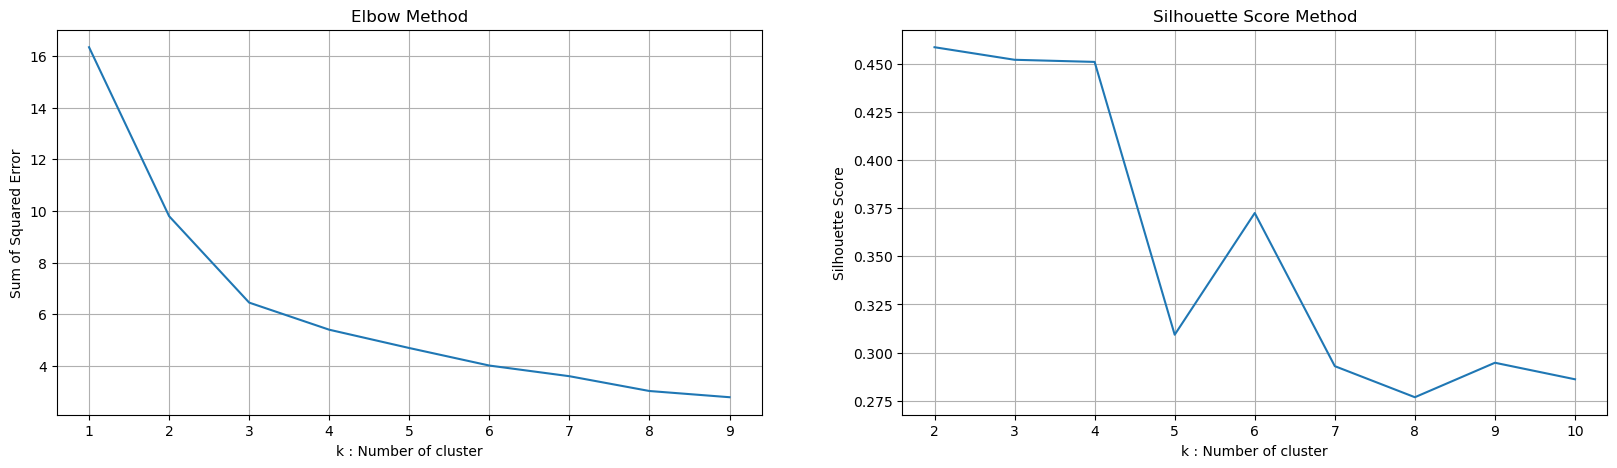

In [26]:
from sklearn.metrics import silhouette_score
sse = {}
sil = []
kmax = 10
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Elbow Method :
plt.subplot(1, 2, 1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = (
        kmeans.inertia_
    )  # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x=list(sse.keys()), y=list(sse.values()))
plt.title("Elbow Method")
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1, 2, 2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric="euclidean"))
sns.lineplot(x=range(2, kmax + 1), y=sil)
plt.title("Silhouette Score Method")
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

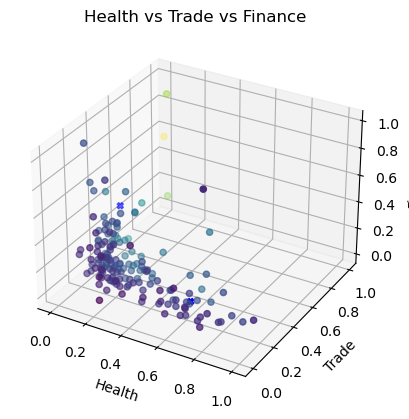

In [29]:
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
df["Class"] = labels
df1["Class"] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
x = np.array(df1["Health"])
y = np.array(df1["Trade"])
z = np.array(df1["Finance"])
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color="b")
ax.scatter3D(x, y, z, c=y)
plt.title("Health vs Trade vs Finance")
ax.set_xlabel("Health")
ax.set_ylabel("Trade")
ax.set_zlabel("Finance")
plt.show()

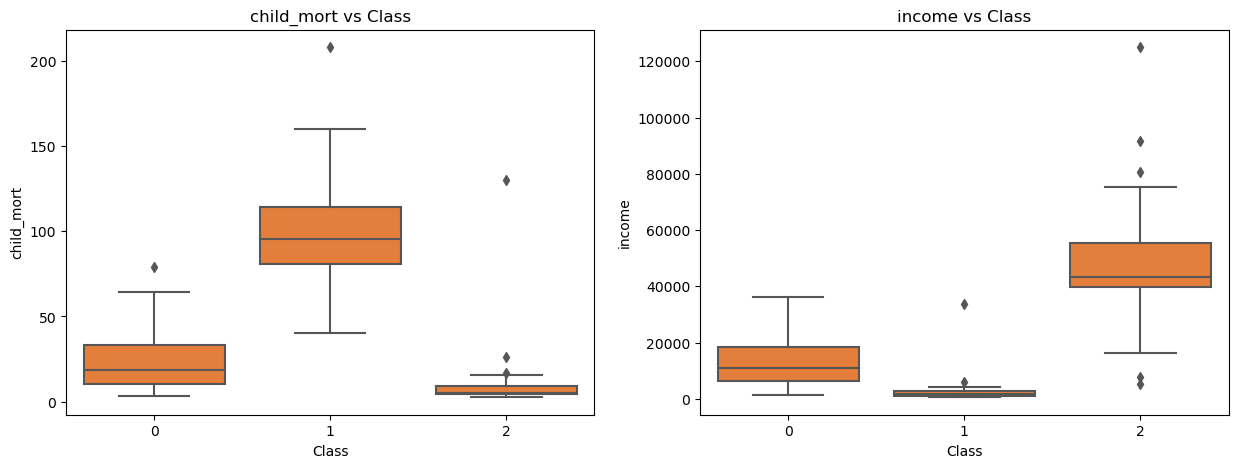

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Class", y="child_mort", data=df, color="#FF781F")
plt.title("child_mort vs Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="Class", y="income", data=df, color="#FF781F")
plt.title("income vs Class")

plt.show()

In [33]:
import plotly.express as px

import kaleido

df1["Class"].loc[df1["Class"] == 0] = "No Help Needed"
df1["Class"].loc[df1["Class"] == 1] = "Help Needed"
df1["Class"].loc[df1["Class"] == 2] = "Might Need Help"

fig = px.choropleth(
    df1[["Country", "Class"]],
    locationmode="country names",
    locations="Country",
    title="Needed Help Per Country (World)",
    color=df1["Class"],
    color_discrete_map={
        "Help Needed": "Red",
        "No Help Needed": "Green",
        "Might Need Help": "Yellow",
    },
)
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(
    legend_title_text="Labels", legend_title_side="top", title_pad_l=260, title_y=0.86
)
fig.show(engine="kaleido")

In [40]:
df1.groupby('Class')['Country'].count()

Class
Help Needed         36
Might Need Help     29
No Help Needed     102
Name: Country, dtype: int64